# 1. 이해하기

## 1.1 옵션 이해하기

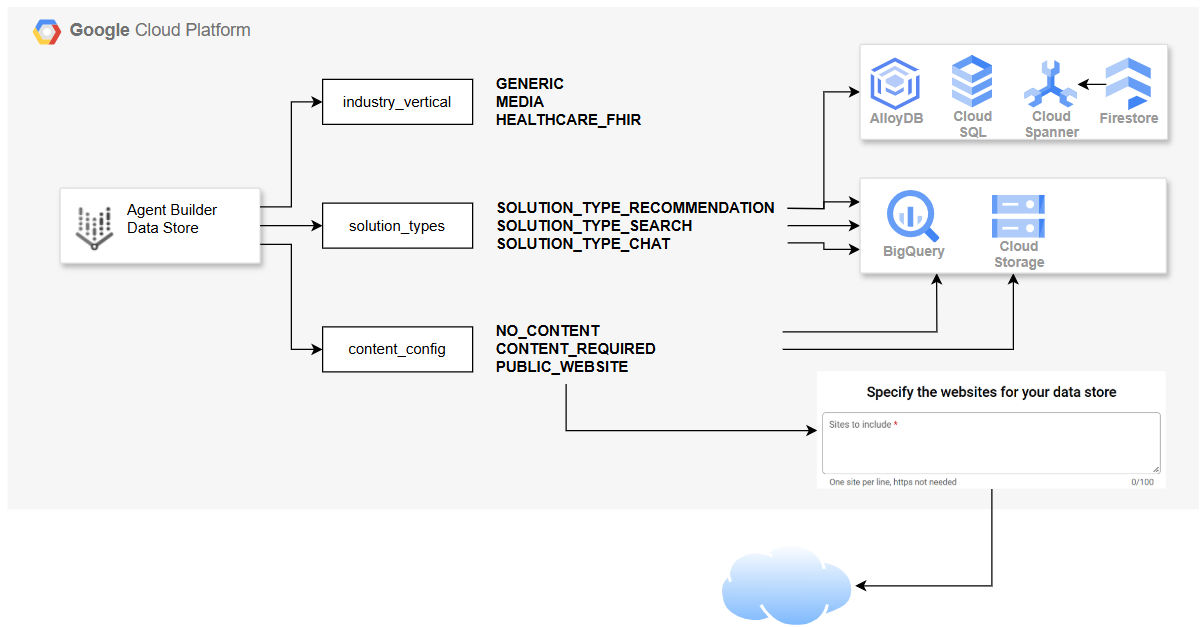

## 1.2 흐름 이해하기

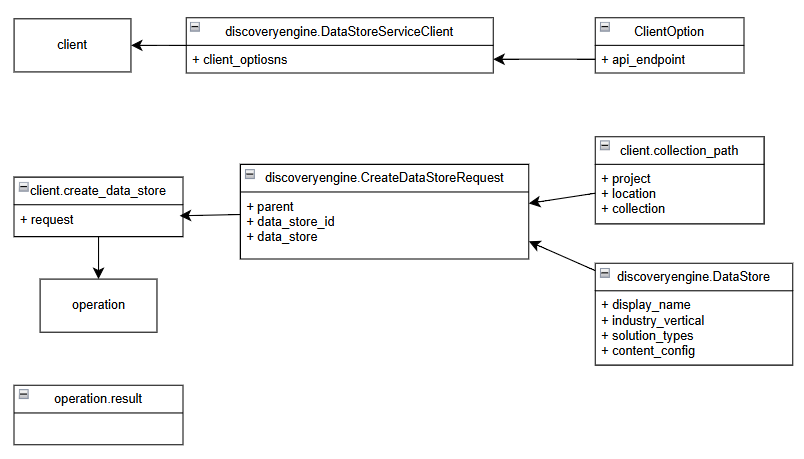

# 2. 코드 이해하기

## 2.1 라이브러리 설치

In [ ]:
!pip install google-cloud-discoveryengine

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 28.1 MB/s eta 0:00:00


In [ ]:
import IPython

app = IPython.Application.instance()
app.kernel.do_shutdown(True)

{'status': 'ok', 'restart': True}

## 2.2 client 생성

In [ ]:
PROJECT_ID=!gcloud config get-value project
PROJECT_ID=PROJECT_ID[0]
LOCATION="global"
DATASTORE_ID="public-web-datastore"

In [ ]:
from google.api_core.client_options import ClientOptions
from google.cloud import discoveryengine

In [ ]:
client_options=
    ClientOptions(api_endpoint=f"{LOCATION}-discoveryengine.googleapis.com")
client = discoveryengine.DataStoreServiceClient(client_options=client_options)
# client = discoveryengine.DataStoreServiceClient()

## 2.3 datasotre 생성

In [ ]:
parent = client.collection_path(
    project=PROJECT_ID,
    location=LOCATION,
    collection="default_collection"
)

In [ ]:
data_store = discoveryengine.DataStore(
    display_name=DATASTORE_ID,
    industry_vertical=discoveryengine.IndustryVertical.GENERIC,
    solution_types=[discoveryengine.SolutionType.SOLUTION_TYPE_SEARCH],
    content_config=discoveryengine.DataStore.ContentConfig.PUBLIC_WEBSITE,
)

In [ ]:
request=discoveryengine.CreateDataStoreRequest(
    parent=parent,
    data_store_id=DATASTORE_ID,
    data_store=data_store
)

In [ ]:
operation=client.create_data_store(request=request)

## 2.4 결과 확인

In [ ]:
print(f"Waiting for operation to complete: {operation.operation.name}")
response = operation.result()

# After the operation is complete,
# get information from operation metadata
metadata = discoveryengine.CreateDataStoreMetadata(operation.metadata)

# Handle the response
print("==== response ====")
print(response)
print("==== metadata ====")
print(metadata)

Waiting for operation to complete: projects/429718924597/locations/global/collections/default_collection/operations/create-data-store-15847400273189514892
==== response ====
name: "projects/429718924597/locations/global/collections/default_collection/dataStores/public-web-datastore"
display_name: "public-web-datastore"
industry_vertical: GENERIC
solution_types: SOLUTION_TYPE_SEARCH
default_schema_id: "default_schema"
content_config: PUBLIC_WEBSITE
serving_config_data_store {
}

==== metadata ====

